Value at risk

Tail risk is the risk of extreme investment outcomes, 
usually on the negative side of the distribution

VaR is a threshold with a given confudence level that losses will not exceed a certain level

Quoted with quantiles such as 95, 99, and 99.9

Historical drawdown 

Drawdown is the percentage loss from the highest cumulative historical point.


Conditional Value at Risk aka CVaR 

an estimate of expected losses sustained in the 
worst 1 - x% of scenarios 

CVaR is commonly quoted with quantiles such as 95, 99, 99.9


In [ ]:
### Importing the necessary packages 

import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import numpy as np

### Analyzing the ETF IDRV 
stock_data = dr.data.get_data_yahoo('IDRV')
stock_data['Returns'] = stock_data['Adj Close'].pct_change()

### Checking our data in order to see if we got what we wanted
stock_data.tail()



,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2020-09-29,33.419998,33.205002,33.270000,33.299999,42800.0,33.299999,0.003586
2020-09-30,33.716999,33.320000,33.320000,33.490002,15600.0,33.490002,0.005706
2020-10-01,34.042000,33.750000,33.980000,33.980000,17400.0,33.980000,0.014631
2020-10-02,33.840000,33.180000,33.180000,33.430000,34900.0,33.430000,-0.016186
2020-10-05,34.340000,33.709999,33.709999,34.310001,26352.0,34.310001,0.026324


In [ ]:
### Calculating the cummulative returns 
cummulative_returns = ((1 + stock_data['Returns']).cumprod() - 1)


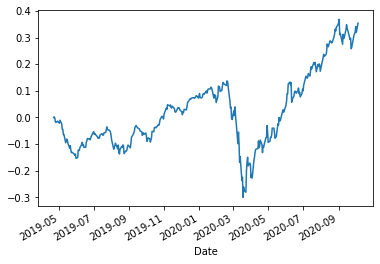

In [ ]:

cummulative_returns.plot()

In [ ]:
### Creating a Series of the returns as percentages
stock_returns_perc = stock_data['Returns']*100
### Dropping NA values from the series
stock_returns_perc.dropna(inplace=True)
stock_returns_perc.tail()

Date
2020-09-29    0.358637
2020-09-30    0.570578
2020-10-01    1.463117
2020-10-02   -1.618597
2020-10-05    2.632369
Name: Returns, dtype: float64

In [ ]:
### Calculating the historical VaR(95)
var_95 = np.percentile(stock_returns_perc, 5)
print(var_95)

-3.0666688023327326


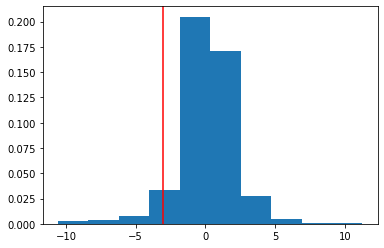

In [ ]:
## Sorting the returns
sorted_returns = stock_returns_perc.sort_values()
## Plotting the histogram of the sorted results
plt.hist(sorted_returns, density=True)
## Drawing a line at the value of VaR(95)
plt.axvline(x = var_95, color='r', linestyle='-')
plt.show()


In [ ]:
## Calculating the historical CVaR
cvar_95 = stock_returns_perc[stock_returns_perc <= var_95].mean()
print(cvar_95)

-5.094987333404502


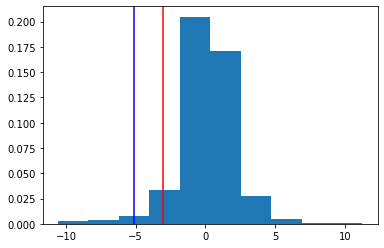

In [ ]:
### plotting histogram
plt.hist(sorted_returns, density=True)
plt.axvline(x = var_95, color='r', linestyle='-')
plt.axvline(x = cvar_95, color='b', linestyle='-')
plt.show()

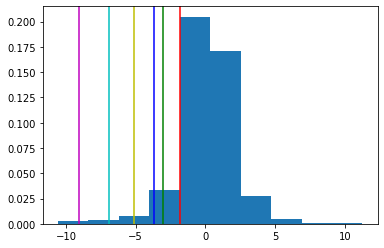

In [ ]:
### Plotting histogram with lines drawn at each of the VaR and CVaR values

var_90 = np.percentile(stock_returns_perc, 10)
var_99 = np.percentile(stock_returns_perc, 1)

cvar_90 = stock_returns_perc[stock_returns_perc <= var_90].mean()
cvar_99 = stock_returns_perc[stock_returns_perc <= var_99].mean()

plt.hist(sorted_returns, density=True)
plt.axvline(x = var_90, color='r', linestyle='-')
plt.axvline(x = cvar_90, color='b', linestyle='-')
plt.axvline(x = var_95, color='g', linestyle='-')
plt.axvline(x = cvar_95, color='y', linestyle='-')
plt.axvline(x = var_99, color='c', linestyle='-')
plt.axvline(x = cvar_99, color='m', linestyle='-')

plt.show()



In [ ]:
### Calculating the parametric VaR

from scipy.stats import norm

stock_returns.tail()


Date
2019-04-18         NaN
2019-04-22   -0.050249
2019-04-23    0.301662
2019-04-24   -0.559084
2019-04-25   -1.376518
Name: Returns, dtype: float64

In [ ]:
## Creating a series stock_returns based on the adjusted close of the original data set
stock_returns = stock_data['Adj Close'].pct_change()
stock_returns.dropna(inplace=True)
stock_returns.head()


Date
2019-04-22   -0.000502
2019-04-23    0.003017
2019-04-24   -0.005591
2019-04-25   -0.013765
2019-04-26   -0.001691
Name: Adj Close, dtype: float64

In [ ]:
## Calculating the Parametric VaR using the norm.ppf() function

## Calculating the mean of the returns
mu = np.mean(stock_returns)
## Claculating the standard deviation
vol = np.std(stock_returns)

confidence_level = .05

var_95 = norm.ppf(confidence_level, mu, vol)
print(var_95)

-0.03172474954237118


In [ ]:
## creating a empty array
forecasted_values = np.empty([100, 2])


[[3.93152935e-316 5.07565891e-317]
 [8.44358189e-321             nan]
 [3.16251369e+180 1.71010548e+214]
 [4.26411324e+257 9.52758905e-130]
 [9.65205198e+183 4.50621784e-144]
 [1.30304044e-142 1.04457389e-142]
 [4.50621794e-144 4.31992594e-096]
 [4.50620572e-144 5.03938850e+180]
 [2.28176682e+243 5.23584369e-143]
 [2.28176682e+243 9.31115425e+242]
 [5.01171106e+217 4.47303447e-143]
 [8.02684521e+165 2.03914759e+180]
 [6.19635191e+223 1.40210426e-142]
 [7.69152992e+218 1.45226496e+296]
 [3.50896888e+151 4.53860734e+257]
 [1.11537529e+277 5.49109388e-143]
 [1.15823459e-152 9.08367206e+223]
 [7.34514289e+223 8.37174974e-144]
 [9.45956265e-076 2.95148952e-075]
 [2.13412571e+257 6.60925411e-062]
 [9.16281386e-072 1.42137876e-076]
 [1.71018236e+214 1.61410559e+132]
 [9.89803615e+164 8.87709131e+135]
 [9.02193423e+217 9.45956265e-076]
 [2.95150006e-075 2.13412571e+257]
 [2.05184874e+161 9.16281387e-072]
 [1.42137876e-076 1.11416848e+218]
 [1.61410559e+132 9.16281386e-072]
 [2.54666879e-104 1.

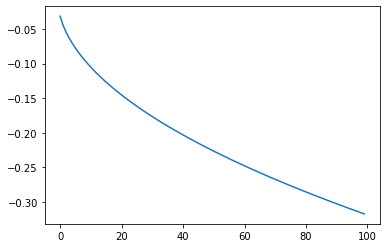

In [ ]:
## Adding data to the forecasted_values 
for i in range(0, 100):
  ## first column will be the index
  forecasted_values[i, 0] = i
  ## second column will be VaR95 value (i + 1) days away
  forecasted_values[i, 1] = var_95 * np.sqrt(i + 1)

## Plotting the results
plt.plot(forecasted_values[:,0], forecasted_values[:,1])

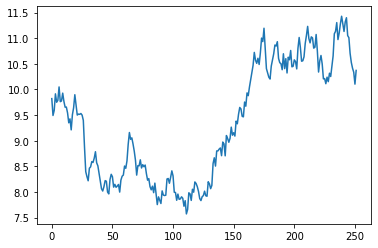

In [ ]:
## Simulating a single, random walk
## number of days
T = 252
## Starting price
S0 = 10
## Creating a random_returns variable with 252 values based on the mean 
## and volatility of the stock, using the np.random.normal function 
## which draws random values from a Gaussian distribution
random_returns = np.random.normal(mu, vol, T) + 1

## Adding multiplying the starting price by the cummulative product so our values start at S0
forecasted_values = S0 * (random_returns.cumprod())

## Plotting our results 
plt.plot(range(0, T), forecasted_values)
plt.show()



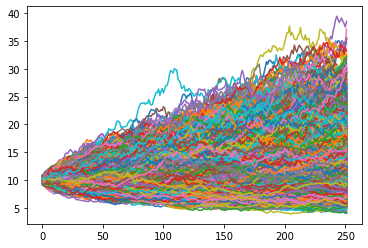

In [ ]:
### Monte Carlo simulation
### Simulating our random walk 10000 times and plotting the results
for i in range(10000):
  ## random returns
  random_returns = np.random.normal(mu, vol, T) + 1
  ## creating the path
  forecasted_values = S0 * (random_returns).cumprod()
  ## Plotting the path
  plt.plot(range(T), forecasted_values)

plt.show()

In [ ]:
## Monte Carlo VaR
## simulating returns and getting the VaR 90 values from it
simulated_returns = []

for i in range(100):
  random_returns = np.random.normal(mu, vol, T)
  simulated_returns.append(random_returns)

var_99 = np.percentile(simulated_returns, 1)
print(var_99)



-0.0449642081933375
